# Decision Trees

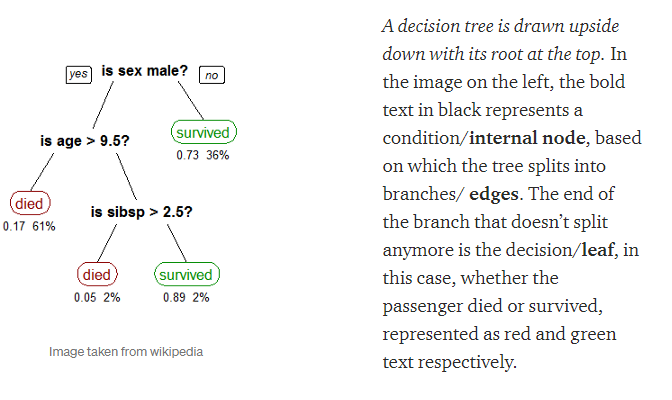


Decision trees are prone to overfitting when the depth of the tree is too large so to avoid that we use pruning and other hyperparameter optimisations and another better way it to perform random forest ( algo made up if different decicions trees)

# Code

In [1]:
#importing important libraries
import pandas as pd
import seaborn as sns
importmatplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreeRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

Data cleaning and visualisation

In [ ]:
#dependent and independent feature extraction
data = pd.read_csv("")
x = data.drop["target_col_name"]
y = data.target_col_name

In [ ]:
#data visualisation and feature importance (extra forest calassifier is the fastest working algo
#                                                    which can be used to calculate the best features)
rr = ExtraTreeRegressor()
rr.fit(xtrain,ytrain)
ypr = rr.predict(xtest)
print("Accuracy score - {} ".format(accuracy_score(ytest,ypr)))
print("Score(test) - {} ".format(rr.score(xtest,ytest)))
print("Score(train) - {} ".format(rr.score(xtrain,ytrain)))

In [ ]:
#plotting the fetureimportance
feature = rr.feature_importances_
plt.figure(figsize = (16,10))
sns.barplot(x = data.columns.drop("output"), y = feature)
plt.plot()

In [ ]:
#plotting a heatmap between corelations (pearson)
sns.heatmap(data.corr(),annot = True)
plt.show()

In [ ]:
# Code to make a list which can be used to remove or etract the couplets of features which are highly corellated
dat = 0 
epp = []
col = data.columns
for i in col:
    for j in col:
        dat = data[i].corr(data[j])
        if dat > 0.4:
            epp.append([i,j])
print(epp)
print(len(epp))


# these list aboce will have some common pairs or repeated names so code blow can be used 
#to extract the final list and we can remoeve these features if we wiah
res = []
for i in epp:
    o = [i[1], i[0]]
    if i[0] != i[1] and i  not in res and o not in res :
        res.append(i)
print(res)
print(len(res))

In [ ]:
#data visualisation
plt.figurre(figsize = (16,9))
sns.pairplot(data)
plt.show()

data scaling and splitting

In [ ]:
#transforming data between 0 to 1
sc = StandardScaler()
sc.fit(x)
x= sc.transdorm(x)

In [ ]:
#transforming data between 0 to 1
sc = StandardScaler()
sc.fit(x)
x= sc.transdorm(x)

# Training our  model

In [ ]:
dtr = DecisionTreeRegressor(
    criterion='mse',                 # instead of mse we can use any of {“mse”, “friedman_mse”, “mae”, “poisson”}
    splitter = "best",               # instead of best we can also use any of {“best”, “random”}
    max_depth=5,                     # can use any integral value i.e. 1,2,3,4,5,6 .......
    min_samples_split=4,             # can use any integral value i.e. 1,2,3,4,5,6 .......
    max_features = 'auto',           # can use any of  {“auto”, “sqrt”, “log2”}
    min_samples_leaf=5            
    )
dtr.fit(xtrain,ytrain)
ypred = dtr.predict(xtest)
print(" score = {}".format(dtr.score(xtrain,ytrain)))
print(" score = {}".format(dtr.score(xtest,ytest)))
print("r2 score = {}".format(r2_score(ypred,ytest)))
print("accuracy score = {}".format(accuracy_score(ypred,ytest))
print("mean squared error = {}".format(mean_squared_error(ypred,ytest)))

In [ ]:
dtr.summary() # model summary

now since we have many different values we can put in thses parameters so we opt for yperparameter tuning using grid search and random search

### Random search

In [ ]:
import numpy as np
dtr1 = DecisionTreeRegressor()
params = {"criterion": ["mse", "mae", 'poisson'],
          "splitter" : ['best', 'random'],
          "max_depth": [int(x) for x in np.linspace(1,100, 60)],
          "min_sample_leaf" = [[int(x) for x in np.linspace(1,100, 60)]]
         "min_samples_split": [0,1,3,5,7,9,11,13,15,17,20,21,25,27,29,33],
          "max_features" : ["auto", "sqrt", "log2"],
         }
random = RandomizedSearchCV(estimator = dtr1,param_distributions = params,n_iter = 100,cv = 4,verbose = 3,n_jobs = -1)
random.fit(xtrain,ytrain)

In [ ]:
random.best_params_

In [ ]:
random.best_score_

In [ ]:
model = random.best_estimator_
model.fit(xtrain,ytrain)
#now u can predict and find accuracy score

### Grid search 

In [ ]:
#not recomended until a fast processor and a lot oof ram in your pc
dtr1 = DecisionTreeRegressor()
params = {"criterion": ["mse", "mae", 'poisson'],
          "splitter" : ['best', 'random'],
          "max_depth": [int(x) for x in np.linspace(1,100, 60)],
          "min_sample_leaf" = [[int(x) for x in np.linspace(1,100, 60)]]
         "min_samples_split": [0,1,3,5,7,9,11,13,15,17,20,21,25,27,29,33],
          "max_features" : ["auto", "sqrt", "log2"],
         }
random = GridSearchCV(estimator = dtr1,param_distributions = params,n_iter = 100,cv = 4,verbose = 3,n_jobs = -1)
random.fit(xtrain,ytrain)

In [ ]:
random.best_params_

In [ ]:
random.best_score_

In [ ]:
model1 = random.best_estimator_
model1.fit(xtrain,ytrain)
#now u can predict and find accuracy score

# Plotting the decision tree and the graph

In [ ]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(model_name,filled=True)

In [ ]:
# code to print the line plot with every feature 
for i in range(shape(xtest)[1])
plt.scatter(xtest[i],ytest)
plt.plot(xtest[i],ypred)
plt.show()